<a href="https://colab.research.google.com/github/garvjain7/Chatbot/blob/main/ml_exp2_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To implement and execute data preprocessing.
Aim for experiment: to implement and execute data preprocessing technique using .csv file
(groupby, dtype, NaN, histogram, imputer, sklearn library, missing values and iloc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [22]:
print(df.describe())
print()
print(df.shape)
print()
print(df.info())
print()
print(df.dtypes)
print()
print(df.isnull())
print()
print(df.isnull().sum())
print()
print(df.isnull().sum().sum())
print()

             Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000

(10, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
None

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

   Country    Age  Salary  Purchased
0    False  False   False      False
1    False  False   False      False
2    False  False   False      False
3    False  False   False      False
4    False  False    Tr

In [23]:
class_count = df.groupby('Purchased').size()
print(class_count)

Purchased
No     5
Yes    5
dtype: int64


In [25]:
country_count = df.groupby('Country').size()
print(country_count)

Country
France     4
Germany    3
Spain      3
dtype: int64


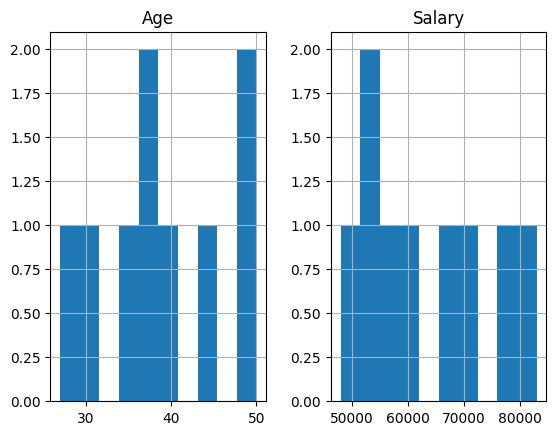

In [27]:
from matplotlib import pyplot as plt
df.hist() # to show histogram for the dataset
plt.show()

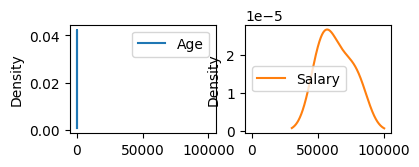

In [30]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=True) # shows the density, allowing subplots, and sharing the x axis, as only y changes between age and salary
plt.show()

In [33]:
X = df.iloc[:,[0,1,2]].values
Y = df.iloc[:,3].values

In [35]:
print(X)
print()
print(Y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # , fill_value=None, VERBOSE=1, copy=True -> this would run in colab but not in jupyter
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [49]:
df = pd.DataFrame(X)
print(df)

print()
# OR
print()

print(X)

         0          1             2
0   France       44.0       72000.0
1    Spain       27.0       48000.0
2  Germany       30.0       54000.0
3    Spain       38.0       61000.0
4  Germany       40.0  63777.777778
5   France       35.0       58000.0
6    Spain  38.777778       52000.0
7   France       48.0       79000.0
8  Germany       50.0       83000.0
9   France       37.0       67000.0


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [50]:
details = pd.DataFrame(X, columns=['Country', 'Age', 'Salary'])
details.isnull().sum()

,0
Country,0
Age,0
Salary,0
